# Introduction to Regression with Neural Networks in TensorFlow

Simple definition : predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [2]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.18.0


## Creating data to view and fit

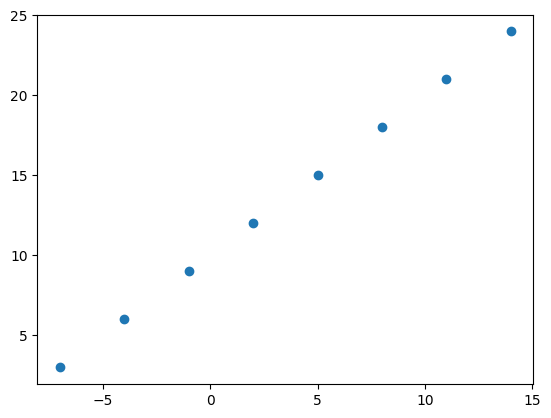

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
X[1], y[1]

(-4.0, 6.0)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [9]:
X[0].ndim

0

In [10]:
X[0], y[0]

(-7.0, 3.0)

In [11]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

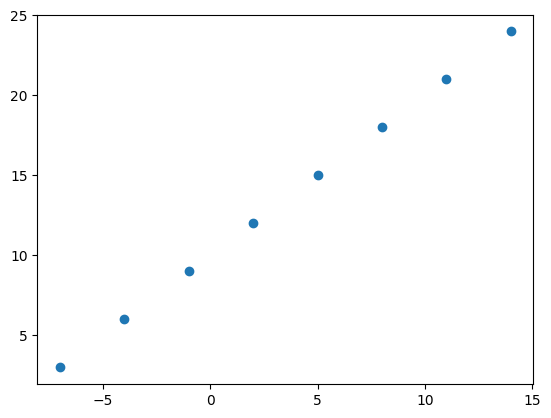

In [13]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss funtion (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and labels).

In [14]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
# model.fit(X, y, epochs=5)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) 

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step - loss: 17.3932 - mae: 17.3932
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 17.1119 - mae: 17.1119
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 16.8307 - mae: 16.8307
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 16.5494 - mae: 16.5494
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 16.2682 - mae: 16.2682


In [15]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Try and make a prediction using our model
y_pred = model.predict(np.array([17.0]))
# y_pred = model.predict([17.0])
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[-10.534977]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hideen layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [17]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
# model.fit(X, y, epochs=100)
# model.fit(X, y, epochs=100)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step - loss: 19.4313 - mae: 19.4313
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 19.1500 - mae: 19.1500
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 18.8688 - mae: 18.8688
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 18.5875 - mae: 18.5875
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 18.3063 - mae: 18.3063
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 18.0250 - mae: 18.0250
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 17.7438 - mae: 17.7438
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 17.4625 - mae: 17.4625
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 17.1813 - mae: 17.1813
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 16.9000 - mae: 16.9000
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 16.6188 - mae: 16.6188
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 16.3375 - mae: 16.3375
Epoch 13/100
1/1 ━━━━

In [18]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's see if our model's prediction has improved...
# model.predict([17.0])
y_pred = model.predict(np.array([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[29.540417]], dtype=float32)

In [20]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              # optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
# model.fit(X, y, epochs=100) 
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.9576 - mae: 13.9576
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 11.4631 - mae: 11.4631
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 9.5686 - mae: 9.5686
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 6.4657 - mae: 6.4657
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 4.8006 - mae: 4.8006
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 5.5416 - mae: 5.5416
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 4.8898 - mae: 4.8898
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 3.9246 - mae: 3.9246
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 4.1619 - mae: 4.1619
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 4.2319 - mae: 4.2319
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 3.7995 - mae: 3.7995
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 3.8608 - mae: 3.8608
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/s

In [21]:
y_pred = model.predict(np.array([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


array([[26.831404]], dtype=float32)

## Evaluting a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model  -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [22]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [23]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

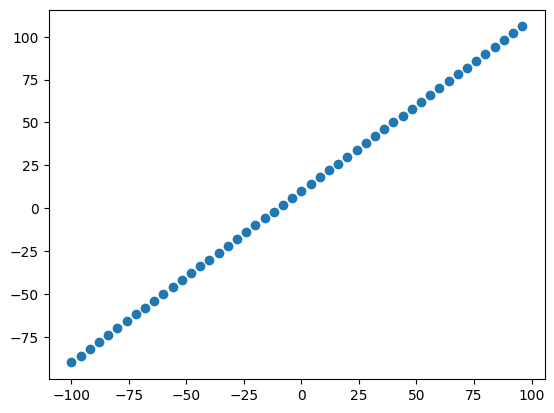

In [24]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.



In [25]:
# Check the length of how many samples we have
len(X)

50

In [26]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data) 
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

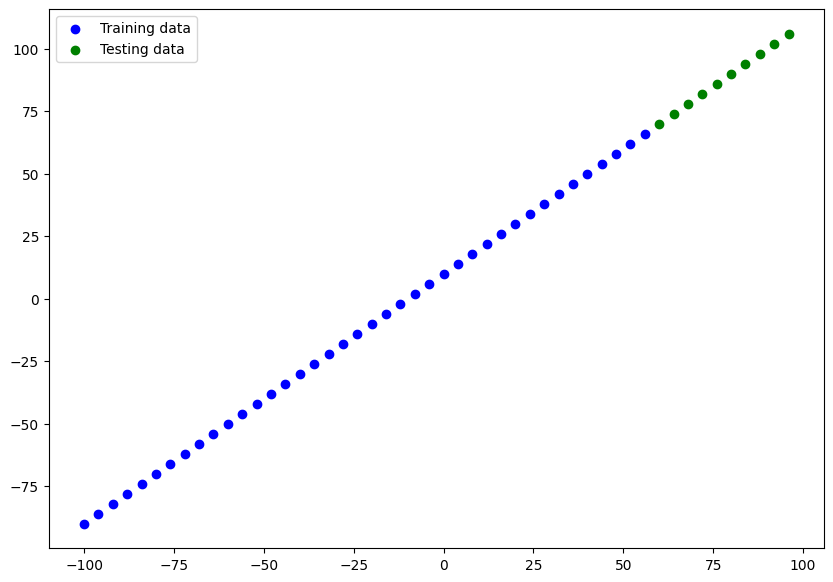

In [27]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data") # our model will learn on this
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data") # want our model to be able to predict this (given X, what's y?)
# Show a legend
plt.legend();

In [28]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                             
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# # 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [29]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [31]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

c:\Users\sachi\.conda\envs\compvision\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).


In [33]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [34]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

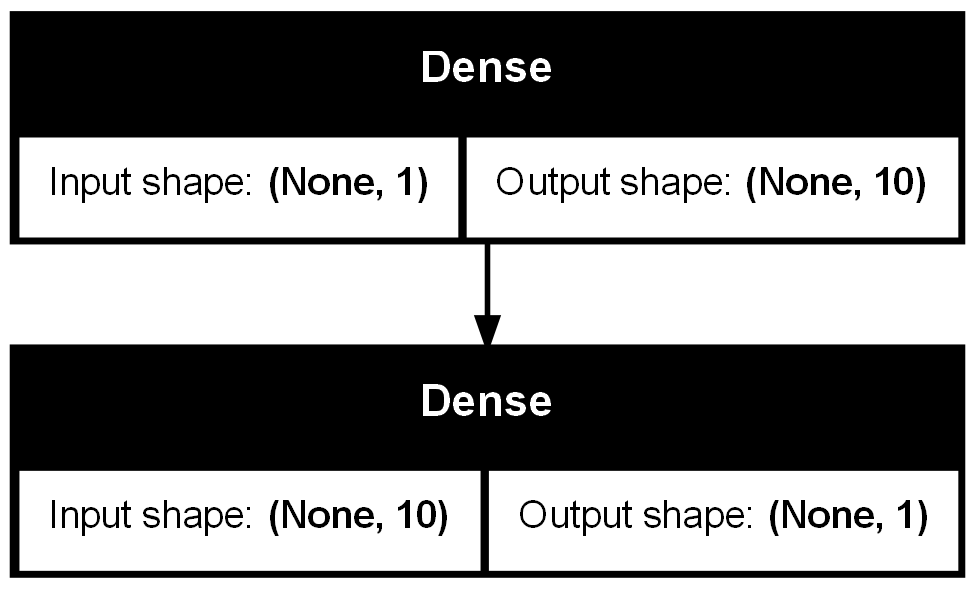

In [35]:
import pydot
import graphviz
from tensorflow.keras.utils import plot_model

# plot_model(model=model)
plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [36]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[33.82579 ],
       [35.976696],
       [38.127605],
       [40.278515],
       [42.429424],
       [44.58033 ],
       [46.73124 ],
       [48.882145],
       [51.03305 ],
       [53.18396 ]], dtype=float32)

In [37]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [38]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

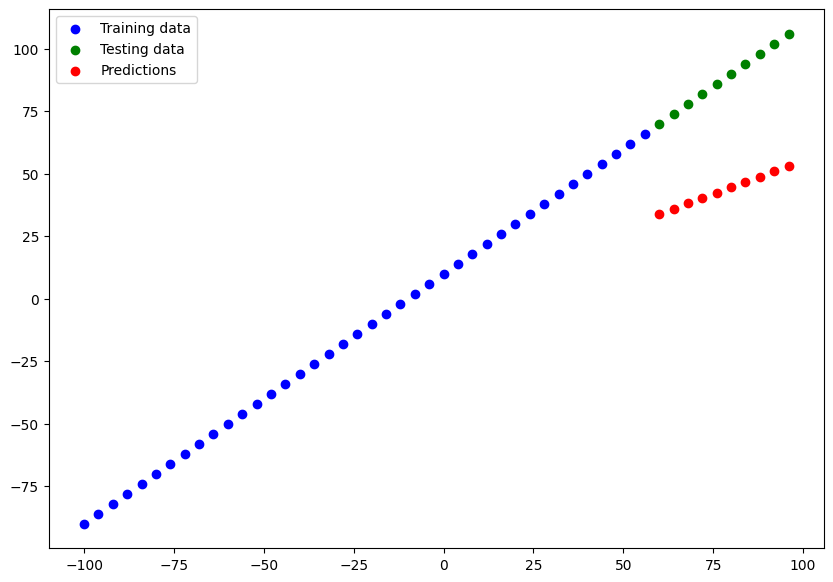

In [39]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluting our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [40]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - loss: 44.4951 - mae: 44.4951


[44.49512481689453, 44.49512481689453]

In [41]:
# Calculate the mean absolute error
# mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                    #  y_pred=tf.constant(y_pred))
# from tensorflow.keras.metrics import MeanAbsoluteError
mae = tf.keras.metrics.mae(y_true=y_test,
                                     y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([36.17421 , 38.023304, 39.872395, 41.721485, 43.570576, 45.41967 ,
       47.26876 , 49.117855, 50.96695 , 52.81604 ], dtype=float32)>

In [42]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[33.82579 ],
       [35.976696],
       [38.127605],
       [40.278515],
       [42.429424],
       [44.58033 ],
       [46.73124 ],
       [48.882145],
       [51.03305 ],
       [53.18396 ]], dtype=float32)>

In [43]:
# Calculate the mean square error
mse = tf.metrics.mse(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=2008.0240478515625>

In [44]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.keras.metrics.mae(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.keras.metrics.mse(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

## Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [45]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
# model_1.fit(X_train, y_train, epochs=100)

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100) 

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 73.3880 - mae: 73.3880 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 38.3600 - mae: 38.3600
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 8.7482 - mae: 8.7482
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 8.6149 - mae: 8.6149
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 8.3886 - mae: 8.3886
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 9.1201 - mae: 9.1201
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 8.2032 - mae: 8.2032
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 8.8592 - mae: 8.8592
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 7.8039 - mae: 7.8039
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 10.7776 - mae: 10.7776
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.6075 - mae: 7.6075
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 11.9514 - mae: 11.9514
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


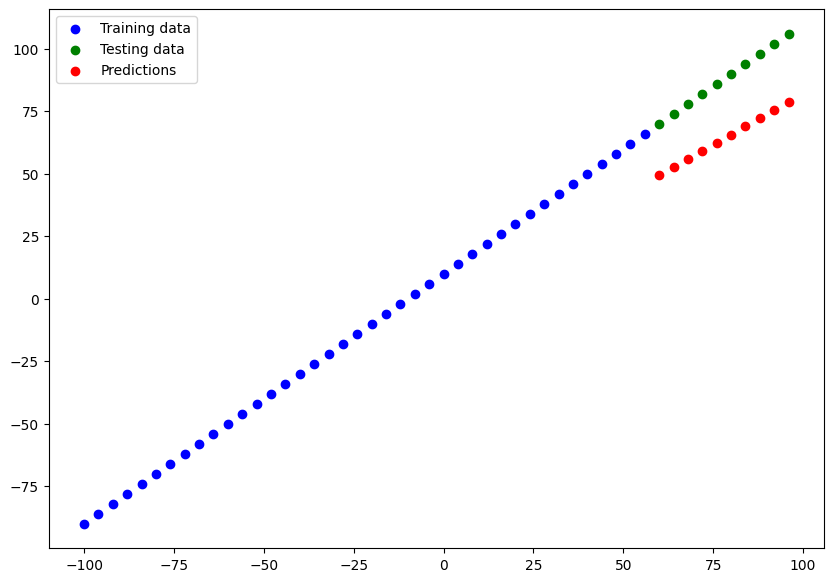

In [46]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [47]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=23.900066375732422>,
 <tf.Tensor: shape=(), dtype=float32, numpy=576.2850341796875>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [48]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
# model_2.fit(X_train, y_train, epochs=100)
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100) 

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 23.4669 - mse: 947.6525 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 21.2113 - mse: 671.0804
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 20.8348 - mse: 593.3774
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 21.7828 - mse: 639.0922
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 14.7109 - mse: 314.5085
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 15.5072 - mse: 334.6316 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 15.9251 - mse: 344.7257
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 11.6814 - mse: 216.9442
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 14.4803 - mse: 290.9184
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 11.0243 - mse: 193.4601
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 14.8449 - mse: 304.1893
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 10.9330 - mse: 190.8845
Epoch 13/10

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


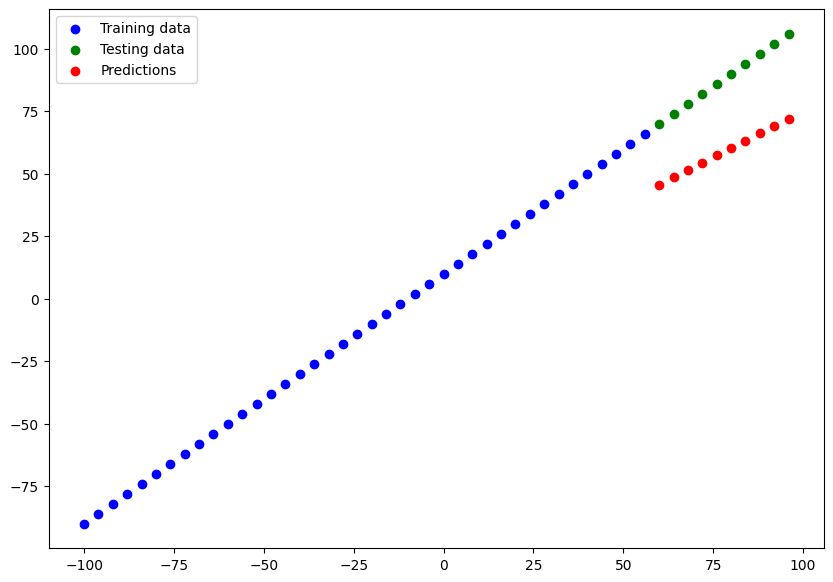

In [49]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [50]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=29.14736557006836>,
 <tf.Tensor: shape=(), dtype=float32, numpy=858.9742431640625>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [51]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
# model_3.fit(X_train, y_train, epochs=500)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100) 

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 10.7577 - mae: 10.7577
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 16.1997 - mae: 16.1997
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 12.6276 - mae: 12.6276
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 14.9626 - mae: 14.9626
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 12.0224 - mae: 12.0224
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 13.3630 - mae: 13.3630
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 16.4818 - mae: 16.4818
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 9.4456 - mae: 9.4456
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 10.4652 - mae: 10.4652
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 11.5199 - mae: 11.5199
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 12.6216 - mae: 12.6216
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 14.6535 - mae: 14.6535
Epoch 13/100
2/2 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


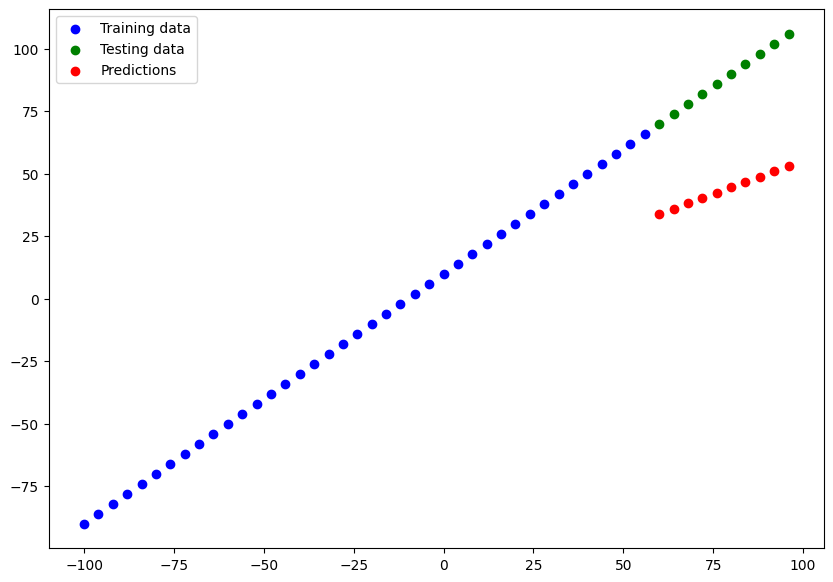

In [52]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [53]:
# Calculate model_3 evalaution metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=44.51017379760742>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2009.9241943359375>)

🔑 **Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

### Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [54]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,23.900066,576.285034
1,model_2,29.147366,858.974243
2,model_3,44.510174,2009.924194


Looks like `model_1` performed the best...

In [55]:
model_2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

> 🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment".


## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 **Resource:** As you build more models, you'll want to look into using:

* [TensorBoard](https://www.tensorflow.org/tensorboard) - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* [Weights & Biases](https://www.wandb.com/) - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [56]:
# Save model using the SavedModel format
model_1.save(".\best_model_SavedModel_format")

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=.est_model_SavedModel_format.

In [ ]:
# Save model using the HDF5 format
model_1.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [57]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_SavedModel_format.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [58]:
# Compare model_1 predictions with SavedModel format model predictions
model_1_preds = model_1.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_1_preds == loaded_SavedModel_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [59]:
# Compare the MAE of model_1 preds and loaded_SavedModel_preds
mae(y_true=y_test, y_pred=model_1_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=False>

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download".
2. Use code (see the cell below).
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

## A larger example

In [62]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [64]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [65]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [66]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [67]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [68]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [69]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9934.6660 - mae: 9934.6660     
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7717.4937 - mae: 7717.4937
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7486.8994 - mae: 7486.8994
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7583.4492 - mae: 7583.4492
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7839.0532 - mae: 7839.0532
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7417.1396 - mae: 7417.1396 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7404.4634 - mae: 7404.4634 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7576.1450 - mae: 7576.1450 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7307.3208 - mae: 7307.3208
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7132.3696 - mae: 7132.3696
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7272.6797 - mae: 7272.6797
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2

In [70]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6359.5103 - mae: 6359.5103  


[6142.59228515625, 6142.59228515625]

In [71]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Same as above but train for longer (200 epochs)
3. (insert your own experiment here)

In [72]:
X_train, y_train

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 560    46  19.950         2        True     False       True       False   
 1285   47  24.320         0        True     False       True       False   
 1142   52  24.860         0        True     False       True       False   
 969    39  34.320         5        True     False       True       False   
 486    54  21.470         3        True     False       True       False   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1095   18  31.350         4        True     False       True       False   
 1130   39  23.870         5        True     False       True       False   
 1294   58  25.175         0       False      True       True       False   
 860    37  47.600         2        True     False      False        True   
 1126   55  29.900         0       False      True       True       False   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [73]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 13273.7803 - mae: 13273.7803
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13145.8125 - mae: 13145.8125 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12886.3750 - mae: 12886.3750
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12354.4551 - mae: 12354.4551
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11392.4150 - mae: 11392.4150 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10010.1934 - mae: 10010.1934
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8558.2832 - mae: 8558.2832 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7623.0947 - mae: 7623.0947 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7420.5928 - mae: 7420.5928 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7385.2676 - mae: 7385.2676
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7363.9287 - mae: 7363.9287
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━

In [74]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5046.4614 - mae: 5046.4614  


[4897.2021484375, 4897.2021484375]

In [75]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6359.5103 - mae: 6359.5103 


[6142.59228515625, 6142.59228515625]

In [76]:
# Set random set
tf.random.set_seed(42)

# 1. Create the model (same as above)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13279.2246 - mae: 13279.2246
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13142.3545 - mae: 13142.3545 
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12862.8066 - mae: 12862.8066 
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12291.1914 - mae: 12291.1914 
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11274.3232 - mae: 11274.3232
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9861.4463 - mae: 9861.4463   
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8426.3896 - mae: 8426.3896 
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7565.5825 - mae: 7565.5825 
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7410.5913 - mae: 7410.5913 
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7381.5303 - mae: 7381.5303 
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7360.2788 - mae: 7360.2788 
Epoch 12/200
34/34 ━━━━━━━━━━━━

In [77]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3481.7219 - mae: 3481.7219  


[3415.70263671875, 3415.70263671875]

In [78]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6359.5103 - mae: 6359.5103


[6142.59228515625, 6142.59228515625]

Text(0.5, 0, 'epochs')

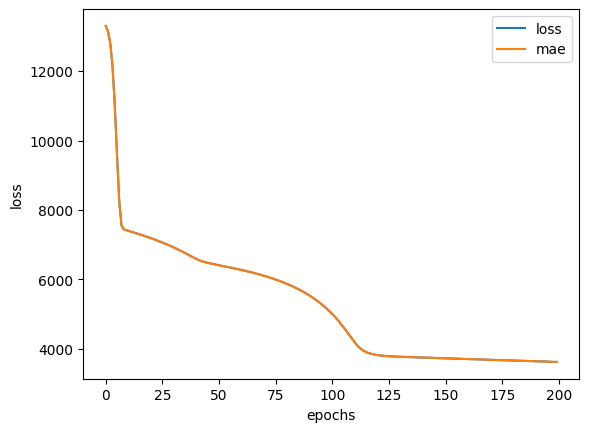

In [79]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> 🤔 **Question:** How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500



To prepare our data, we can borrow a few classes from Scikit-Learn.

In [81]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [82]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [83]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [84]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [85]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 13297.4756 - mae: 13297.4756
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13291.3516 - mae: 13291.3516
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13274.6367 - mae: 13274.6367
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13236.7695 - mae: 13236.7695
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13166.8184 - mae: 13166.8184
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13054.1016 - mae: 13054.1016 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12888.2295 - mae: 12888.2295
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12659.1133 - mae: 12659.1133
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12356.9102 - mae: 12356.9102
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11973.6592 - mae: 11973.6592
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11516.0908 - mae: 11516.0908
Epoch 12/100
34/34 ━━━━━━━━━━

In [86]:
# Evalaute our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3521.9519 - mae: 3521.9519  


[3435.518310546875, 3435.518310546875]

#### Insurance model 2 
#### results9/9 [==============================] - 0s -  5ms/step - loss: 5046.4614 - mae: 5046.4614

Our model (`insurance_model_4`) fit on normalized data achieved a ~30% better score compared to the same model (`insurnace_model_2`) fit on non-normalized data!

In [87]:
insurance_model_2.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,665 (26.04 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,444 (17.36 KB)